# Visualize CBS Wijkbuurtkaart with Geopandas

In [1]:
import geopandas as gpd

import pandas as pd

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

### Get the data

In [23]:
!ls '../datasets/CBS Wijkbuurtkaart'

WijkBuurtkaart_2024_v1     WijkBuurtkaart_2024_v1.zip


In [27]:
filename = r'../datasets/CBS Wijkbuurtkaart/WijkBuurtkaart_2024_v1/wijkenbuurten_2024_v1.gpkg'


In [28]:
gpd.list_layers(filename)

,name,geometry_type
0,buurten,MultiPolygon
1,gemeenten,MultiPolygon
2,wijken,MultiPolygon


In [29]:
gemeenten = gpd.read_file(filename, layer='gemeenten')

In [30]:
gemeenten.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 219 columns):
 #    Column                                                Dtype   
---   ------                                                -----   
 0    gemeentecode                                          object  
 1    gemeentenaam                                          object  
 2    indelingswijziging_wijken_en_buurten                  int32   
 3    water                                                 object  
 4    omgevingsadressendichtheid                            int32   
 5    stedelijkheid_adressen_per_km2                        int32   
 6    bevolkingsdichtheid_inwoners_per_km2                  int32   
 7    aantal_inwoners                                       int32   
 8    mannen                                                int32   
 9    vrouwen                                               int32   
 10   percentage_personen_0_tot_15_jaar                   

In [31]:
gemeenten = gemeenten[gemeenten['water']=='NEE'].copy()

In [32]:
nrows, ncolumns = gemeenten.shape
print(f'{nrows} rijen en {ncolumns} kolommen')

342 rijen en 219 kolommen


In [33]:
gemeenten.iloc[:, :-3].head()

,gemeentecode,gemeentenaam,indelingswijziging_wijken_en_buurten,water,omgevingsadressendichtheid,stedelijkheid_adressen_per_km2,bevolkingsdichtheid_inwoners_per_km2,aantal_inwoners,mannen,vrouwen,percentage_personen_0_tot_15_jaar,percentage_personen_15_tot_25_jaar,percentage_personen_25_tot_45_jaar,percentage_personen_45_tot_65_jaar,percentage_personen_65_jaar_en_ouder,percentage_ongehuwd,percentage_gehuwd,percentage_gescheid,percentage_verweduwd,geboorte_totaal,geboortes_per_1000_inwoners,sterfte_totaal,sterfte_relatief,aantal_huishoudens,percentage_eenpersoonshuishoudens,percentage_huishoudens_zonder_kinderen,percentage_huishoudens_met_kinderen,gemiddelde_huishoudsgrootte,percentage_met_herkomstland_nederland,percentage_met_herkomstland_uit_europa_excl_nl,percentage_met_herkomstland_buiten_europa,percentage_geb_in_nl_met_herkomstland_nederland,perc_geb_in_nl_met_herkomstland_in_europa_ex_nl,perc_geb_in_nl_met_herkomstland_buiten_europa,perc_geb_buiten_nl_met_herkomstlnd_in_europa_ex_nl,perc_geb_buiten_nl_met_herkomstlnd_buiten_europa,aantal_bedrijven_landbouw_bosbouw_visserij,aantal_bedrijven_nijverheid_energie,aantal_bedrijven_handel_en_horeca,aantal_bedrijven_vervoer_informatie_communicatie,aantal_bedrijven_financieel_onroerend_goed,aantal_bedrijven_zakelijke_dienstverlening,aantal_bedrijven_overheid_onderwijs_en_zorg,aantal_bedrijven_cultuur_recreatie_overige,aantal_bedrijfsvestigingen,woningvoorraad,gemiddelde_woningwaarde,percentage_eengezinswoning,percentage_meergezinswoning,percentage_bewoond,percentage_koopwoningen,percentage_huurwoningen,perc_huurwoningen_in_bezit_woningcorporaties,perc_huurwoningen_in_bezit_overige_verhuurders,percentage_woningen_met_eigendom_onbekend,percentage_bouwjaarklasse_tot_2000,percentage_bouwjaarklasse_vanaf_2000,percentage_leegstand_woningen,gemiddeld_gasverbruik_totaal,gemiddeld_gasverbruik_appartement,gemiddeld_gasverbruik_tussenwoning,gemiddeld_gasverbruik_hoekwoning,gemiddeld_gasverbruik_2_onder_1_kap_woning,gemiddeld_gasverbruik_vrijstaande_woning,gemiddeld_gasverbruik_huurwoning,gemiddeld_gasverbruikkoopwoning,gemiddeld_elektriciteitsverbruik_totaal,gemiddeld_elektriciteitsverbruik_appartement,gemiddeld_elektriciteitsverbruik_tussenwoning,gemiddeld_elektriciteitsverbruik_hoekwoning,gem_elektriciteitsverbruik_2_onder_1_kap_woning,gem_elektriciteitsverbruik_vrijstaande_woning,gemiddeld_elektriciteitsverbruik_huurwoning,gemiddeld_elektriciteitsverbruikkoopwoning,percentage_woningen_met_stadsverwarming,opleidingsniveau_laag,opleidingsniveau_middelbaar,opleidingsniveau_hoog,netto_arbeidsparticipatie,percentage_werknemers,percentage_zelfstandigen,aantal_inkomensontvangers,gemiddeld_inkomen_per_inkomensontvanger,gemiddeld_inkomen_per_inwoner,percentage_personen_met_hoog_inkomen,percentage_personen_met_laag_inkomen,percentage_huishoudens_met_hoog_inkomen,percentage_huishoudens_met_laag_inkomen,percentage_huishoudens_met_laagste_inkomen,percentage_huishoudens_onder_of_rond_sociaal_minimum,aantal_personen_met_een_ao_uitkering_totaal,aantal_personen_met_een_ww_uitkering_totaal,aantal_personen_met_een_alg_bijstandsuitkering_tot,aantal_personen_met_een_aow_uitkering_totaal,gemiddeld_gestandaardiseerd_inkomen_van_huishoudens,huishoudens_tot_110_percent_van_sociaal_minimum,huishoudens_tot_120_percent_van_sociaal_minimum,mediaan_vermogen_van_particuliere_huish,aantal_jongeren_met_jeugdzorg_in_natura,percentage_jongeren_met_jeugdzorg_in_natura,aantal_wmo_clienten,aantal_wmo_clienten_per_1000_inwoners,personenautos_totaal,personenautos_per_huishouden,personenautos_per_km2,motortweewielers_totaal,aantal_personenautos_met_brandstof_benzine,aantal_personenautos_met_overige_brandstof,oppervlakte_totaal_in_ha,oppervlakte_land_in_ha,oppervlakte_water_in_ha,huisartsenpraktijk_gemiddelde_afstand_in_km,huisartsenpraktijk_gemiddeld_aantal_binnen_1_km,huisartsenpraktijk_gemiddeld_aantal_binnen_3_km,huisartsenpraktijk_gemiddeld_aantal_binnen_5_km,huisartsenpost_gemiddelde_afstand_in_km,apotheek_gemiddelde_afstan

<Axes: >

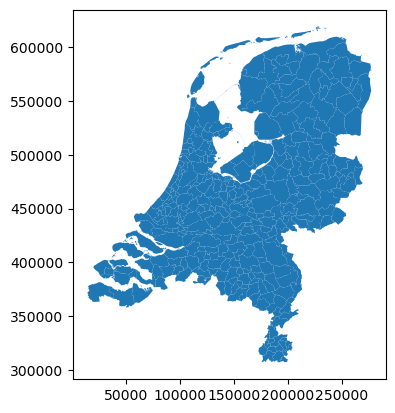

In [34]:
gemeenten.plot()

<Axes: >

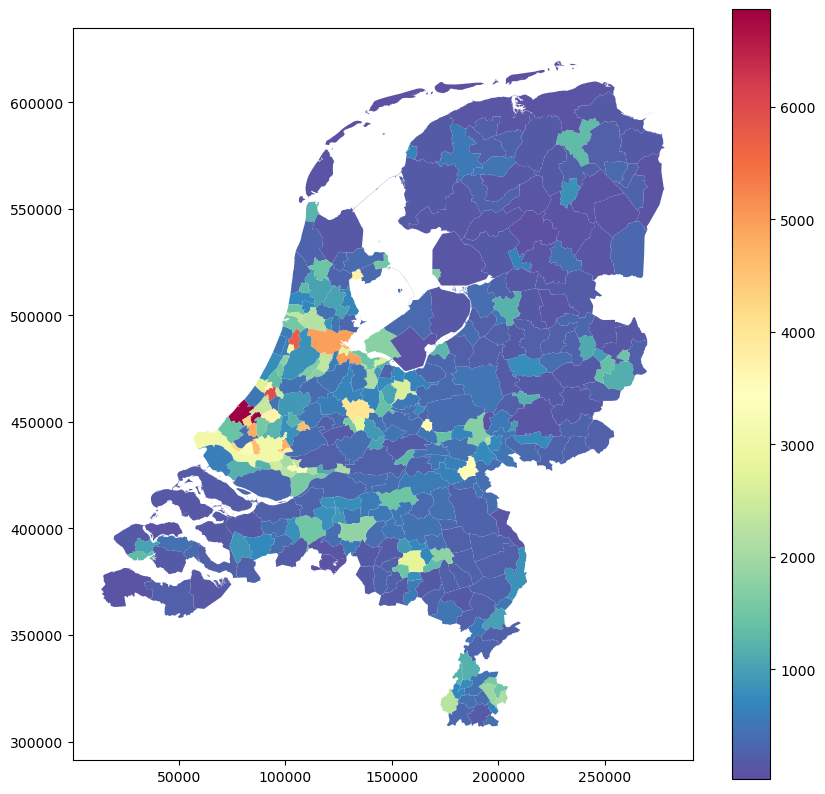

In [35]:
gemeenten.plot(column='bevolkingsdichtheid_inwoners_per_km2', 
               figsize=(10, 10), 
               cmap='Spectral_r', 
               legend=True)

In [36]:
gemeenten[['gemeentecode','gemeentenaam','bevolkingsdichtheid_inwoners_per_km2']].nlargest(10, 'bevolkingsdichtheid_inwoners_per_km2')

,gemeentecode,gemeentenaam,bevolkingsdichtheid_inwoners_per_km2
229,GM0518,'s-Gravenhage,6868
236,GM0546,Leiden,5954
197,GM0392,Haarlem,5739
188,GM0363,Amsterdam,4950
225,GM0503,Delft,4835
224,GM0502,Capelle aan den IJssel,4803
248,GM0606,Schiedam,4596
228,GM0513,Gouda,4592
247,GM0603,Rijswijk (ZH.),4267
239,GM0556,Maassluis,4243


In [37]:
gemeenten[['gemeentecode','gemeentenaam','bevolkingsdichtheid_inwoners_per_km2']].nsmallest(10, 'bevolkingsdichtheid_inwoners_per_km2')

,gemeentecode,gemeentenaam,bevolkingsdichtheid_inwoners_per_km2
94,GM0088,Schiermonnikoog,23
97,GM0096,Vlieland,30
96,GM0093,Terschelling,56
152,GM0277,Rozendaal,66
88,GM0060,Ameland,68
359,GM1701,Westerveld,72
365,GM1714,Sluis,83
214,GM0448,Texel,85
355,GM1695,Noord-Beveland,92
273,GM0744,Baarle-Nassau,93


In [38]:
gemeenten['man_vrouw'] = gemeenten['mannen'] / gemeenten['vrouwen']

<Axes: >

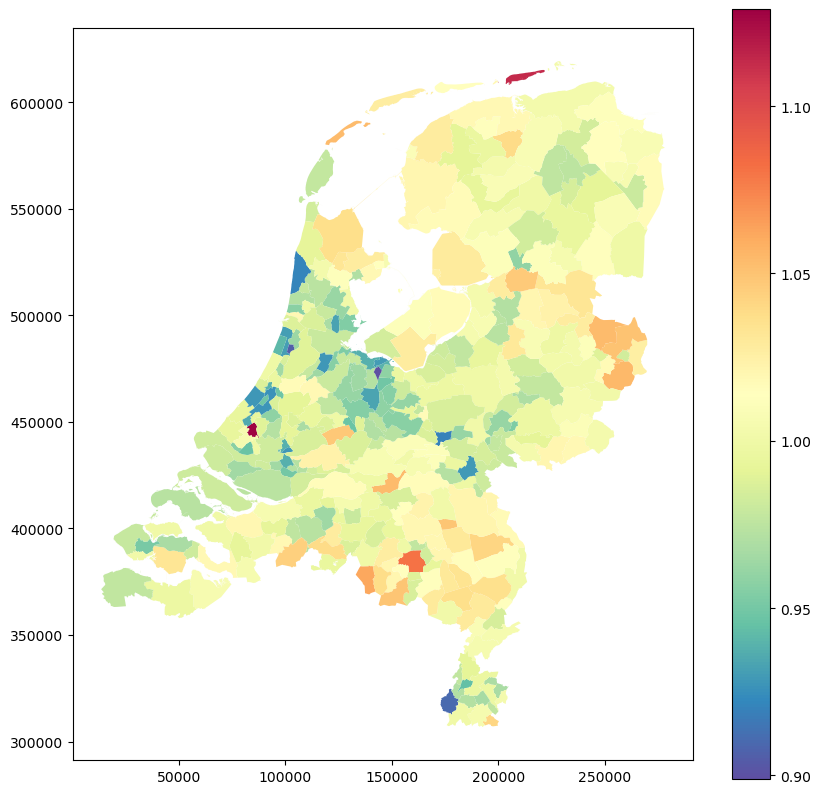

In [39]:
gemeenten.plot(column='man_vrouw', figsize=(10, 10), cmap='Spectral_r', legend=True)

In [40]:
gemeenten[['gemeentecode','gemeentenaam','man_vrouw']].nlargest(10, 'man_vrouw')

,gemeentecode,gemeentenaam,man_vrouw
225,GM0503,Delft,1.128990
94,GM0088,Schiermonnikoog,1.113043
283,GM0772,Eindhoven,1.080592
348,GM1667,Reusel-De Mierden,1.062120
108,GM0153,Enschede,1.054442
120,GM0183,Tubbergen,1.054046
97,GM0096,Vlieland,1.054010
145,GM0263,Maasdriel,1.053539
380,GM1774,Dinkelland,1.050222
369,GM1724,Bergeijk,1.049760


In [41]:
gemeenten[['gemeentecode','gemeentenaam','man_vrouw']].nsmallest(10, 'man_vrouw')

,gemeentecode,gemeentenaam,man_vrouw
207,GM0417,Laren (NH.),0.898904
200,GM0397,Heemstede,0.905331
321,GM0935,Maastricht,0.909803
156,GM0289,Wageningen,0.919962
189,GM0373,Bergen (NH.),0.921181
236,GM0546,Leiden,0.926641
397,GM1916,Leidschendam-Voorburg,0.927107
254,GM0629,Wassenaar,0.927865
235,GM0542,Krimpen aan den IJssel,0.928399
187,GM0362,Amstelveen,0.928435
